# Parte 1 - Preprocesado de los datos

# Importación de las librerías

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar el dataset de entrenamiento

In [6]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set  = dataset_train.iloc[:, 1:2].values

# Escalado de características

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Crear una estructura de datos con 60 timesteps y 1 salida

In [8]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


# Redimensión de los datos

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Parte 2 - Construcción de la RNR

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [11]:
regressor = Sequential()

# Añadir la primera capa de LSTM y la regulariación por Dropout

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

# Añadir la segunda capa de LSTM y la regulariación por Dropout

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

# Añadir la tercera capa de LSTM y la regulariación por Dropout

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

# Añadir la cuarta capa de LSTM y la regulariación por Dropout


In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Añadir la capa de salida

In [16]:
regressor.add(Dense(units = 1))

# Compilar la RNR
# Como va a ser entrenada?

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Ajustar la RNR al conjunto de entrenamiento

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 55ms/step - loss: 0.0419
Epoch 2/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0067
Epoch 4/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0044
Epoch 5/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0054
Epoch 10/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

# Parte 3 - Ajustar las predicciones y visualizar los resultados

# Obtener el valor de las acciones reales  de Enero de 2017

In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


# Obtener la predicción de la acción con la RNR para Enero de 2017

1/1 [==============================] - 2s 2s/step


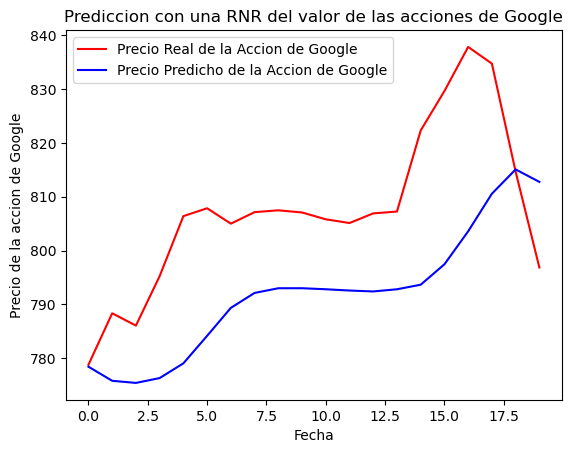

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizar los Resultados
plt.plot(real_stock_price, color = 'red', label = 'Precio Real de la Accion de Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Precio Predicho de la Accion de Google')
plt.title("Prediccion con una RNR del valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google")
plt.legend()
plt.show()

